-----------
Initializing structure...
time for choose_chunkdivision = 4.31538e-05 s
Working in 2D dimensions.
Computational cell is 10 x 10 x 0 with resolution 50
time for set_epsilon = 0.140897 s
-----------
MPB solved for frequency_1(1,0,0) = 1 after 50 iters
MPB solved for frequency_1(0.645161,0,0) = 0.645161 after 1 iters


FloatProgress(value=0.0, description='0% done ')

Meep progress: 23.76/100.0 = 23.8% done in 4.0s, 12.8s to go
on time step 2378 (time=23.78), 0.00168246 s/step
Meep progress: 54.24/100.0 = 54.2% done in 8.0s, 6.8s to go
on time step 5426 (time=54.26), 0.00131244 s/step
Meep progress: 85.17/100.0 = 85.2% done in 12.0s, 2.1s to go
on time step 8519 (time=85.19), 0.00129348 s/step
run 0 finished at t = 100.0 (10000 timesteps)


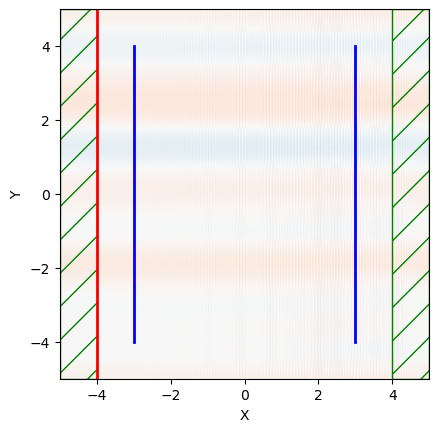

In [2]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import SiO2
from meep.materials import Si

pml_layers = [mp.PML(thickness=1,direction=mp.X)]
cell_size = mp.Vector3(10,10)

wavelength= 1.55
fcen = 1 / wavelength
df = 0.2
nfreq = 3
n2 = mp.Medium(epsilon=1.5)

src = mp.GaussianSource(fcen,df)


sources = [
    mp.EigenModeSource(
        src,
        eig_band=1,
        direction=mp.NO_DIRECTION,
        eig_kpoint=mp.Vector3(1),
        size=mp.Vector3(y=10),
        center=mp.Vector3(-4)
    )
]





geometry=[]


sim = mp.Simulation(resolution=50,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    k_point=mp.Vector3())

# reflected flux
refl_fr = mp.FluxRegion(
    center=mp.Vector3(-3, 0, 0), size=mp.Vector3(0, 8, 0)
)
refl = sim.add_flux(fcen, df, nfreq, refl_fr)

# transmitted flux
tran_fr = mp.FluxRegion(
    center=mp.Vector3(3, 0, 0), size=mp.Vector3(0, 8, 0)
)
tran = sim.add_flux(fcen, df, nfreq, tran_fr)



sim.run(until=100)

plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [3]:
straight_refl_data = sim.get_flux_data(refl)
straight_tran_flux = mp.get_fluxes(tran)

In [4]:
sim.reset_meep()

-----------
Initializing structure...
time for choose_chunkdivision = 7.08103e-05 s
Working in 2D dimensions.
Computational cell is 10 x 10 x 0 with resolution 50
     block, center = (-0.35,0,0)
          size (0.7,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (2,0,0)
          size (4,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.265359 s
lorentzian susceptibility: frequency=0.000905797, gamma=0
lorentzian susceptibility: frequency=0.88125, gamma=0
lorentzian susceptibility: frequency=3.31657, gamma=0
lorentzian susceptibility: frequency=9.67865, gamma=0.0806554
-----------
MPB solved for frequency_1(1,0,0) = 1 after 50 iters
MPB solved for frequency_1(0.645161,0,0) = 0.645161 after 1 iters


/home/user/anaconda3/envs/mp/lib/python3.11/site-packages/meep/simulation.py:1652: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)
/home/user/anaconda3/envs/mp/lib/python3.11/site-packages/meep/simulation.py:1656: RuntimeWarning: DFT frequency 0.5451612903225806 is out of material's range of 0.5649717514124294-0.7352941176470588
  warnings.warn(
/home/user/anaconda3/envs/mp/lib/python3.11/site-packages/meep/simulation.py:1656: RuntimeWarning: DFT frequency 0.7451612903225806 is out of material's range of 0.5649717514124294-0.7352941176470588
  warnings.warn(


FloatProgress(value=0.0, description='0% done ')

Meep progress: 4.98/100.0 = 5.0% done in 4.0s, 76.4s to go
on time step 498 (time=4.98), 0.00803741 s/step
Meep progress: 9.97/100.0 = 10.0% done in 8.0s, 72.3s to go
on time step 997 (time=9.97), 0.00801791 s/step
Meep progress: 14.99/100.0 = 15.0% done in 12.0s, 68.1s to go
on time step 1499 (time=14.99), 0.00796833 s/step
Meep progress: 19.7/100.0 = 19.7% done in 16.0s, 65.3s to go
on time step 1970 (time=19.7), 0.00849886 s/step
Meep progress: 24.72/100.0 = 24.7% done in 20.0s, 60.9s to go
on time step 2472 (time=24.72), 0.00797244 s/step
Meep progress: 29.560000000000002/100.0 = 29.6% done in 24.0s, 57.2s to go
on time step 2956 (time=29.56), 0.008276 s/step
Meep progress: 34.26/100.0 = 34.3% done in 28.0s, 53.8s to go
on time step 3426 (time=34.26), 0.00851204 s/step
Meep progress: 39.57/100.0 = 39.6% done in 32.0s, 48.9s to go
on time step 3957 (time=39.57), 0.00753915 s/step
Meep progress: 45.29/100.0 = 45.3% done in 36.0s, 43.5s to go
on time step 4529 (time=45.29), 0.0069936 

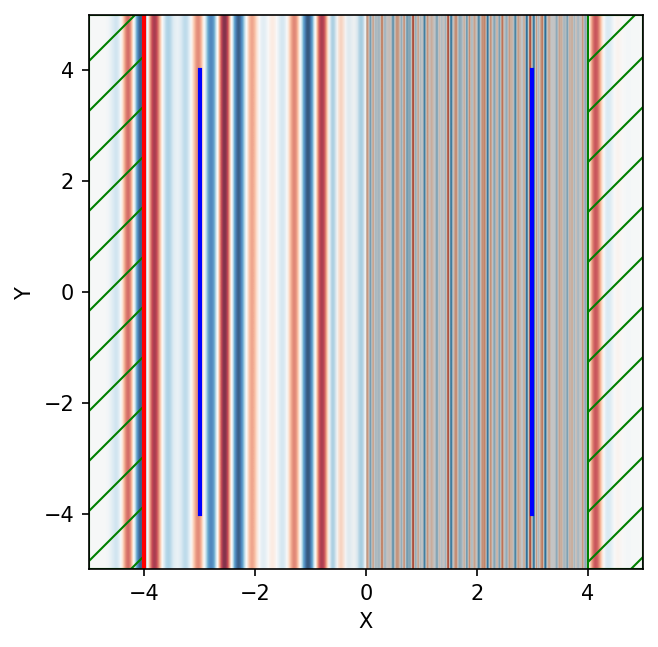

In [5]:
geometry = [mp.Block(
        mp.Vector3(0.7, 10, 0),
        center=mp.Vector3(-0.35,0),
        material=SiO2
    ),
        mp.Block(
        mp.Vector3(4, 10, 0),
        center=mp.Vector3(2,0),
        material=Si
    ),
           ]

sim = mp.Simulation(resolution=50,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    k_point=mp.Vector3())

# reflected flux
refl = sim.add_flux(fcen, df, nfreq, refl_fr)

tran = sim.add_flux(fcen, df, nfreq, tran_fr)

# for normal run, load negated fields to subtract incident from refl. fields
sim.load_minus_flux_data(refl, straight_refl_data)

sim.run(until=100)

bend_refl_flux = mp.get_fluxes(refl)
bend_tran_flux = mp.get_fluxes(tran)

flux_freqs = mp.get_flux_freqs(refl)

plt.figure(dpi=150)
sim.plot2D(fields=mp.Ez)
plt.show()

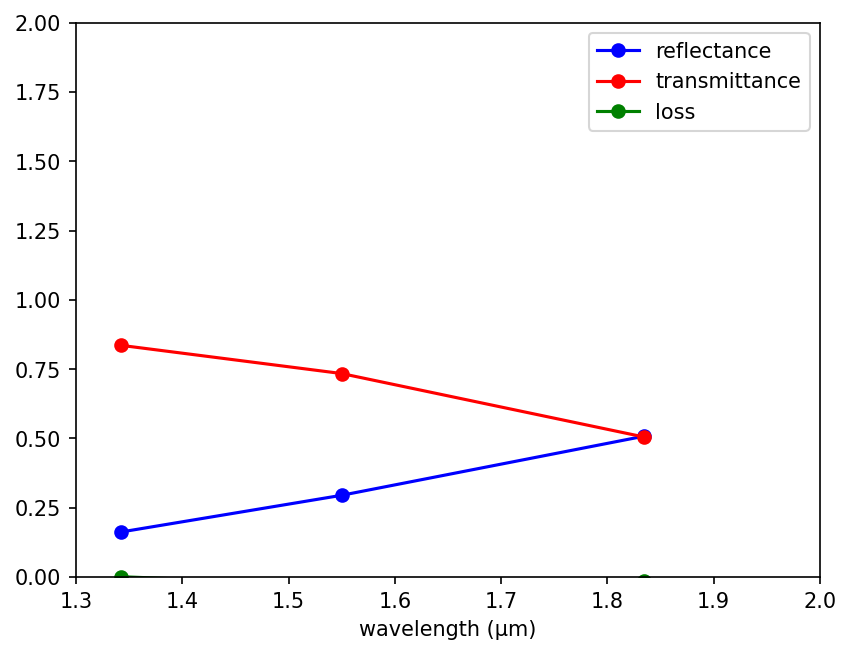

In [6]:
wl = []
Rs = []
Ts = []
for i in range(nfreq):
    wl = np.append(wl, 1 / flux_freqs[i])
    Rs = np.append(Rs, -bend_refl_flux[i] / straight_tran_flux[i])
    Ts = np.append(Ts, bend_tran_flux[i] / straight_tran_flux[i])

if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl, Rs, "bo-", label="reflectance")
    plt.plot(wl, Ts, "ro-", label="transmittance")
    plt.plot(wl, 1 - Rs - Ts, "go-", label="loss")
    plt.axis([1.3, 2.0, 0, 2])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()